In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 29 21:06:30 2022
Modified on Mon Sept 9 by awb9691
@author: ssb60
@author: Abigail Broscius awb9691@rit.edu
"""
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.callbacks import History
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import tensorflow as tf
import torch
from torch import nn
from torch.autograd import Variable
from pathlib import Path
import os

In [2]:
# Check for GPU architecture/compat
print("CUDA version:", torch.version.cuda)
print("GPU available? (pytorch):", torch.cuda.is_available())


CUDA version: 11.8
GPU available? (pytorch): False


In [3]:
# Load in data
Time_series_X_train = torch.tensor(np.load(r'T_s_X_train.npy'), dtype=torch.float32)
Time_series_Y_train = torch.tensor(np.load(r'T_s_Y_train_flattened.npy'), dtype=torch.float32)
Time_series_X_test = torch.tensor(np.load(r'T_s_X_test.npy'), dtype=torch.float32)
Time_series_Y_test = torch.tensor(np.load(r'T_s_Y_test_flattened.npy'), dtype=torch.float32)

In [4]:
# Check data shape
print("x train shape:")
print(Time_series_X_train.shape)
print("y train shape:")
print(Time_series_Y_train.shape)


x train shape:
torch.Size([5644, 192, 120])
y train shape:
torch.Size([5644, 2880])


In [20]:
# Create File System for saving output

# Parent Directories
parent_dir = r".\Outputs_from_models"
directory = "path_testing"  # change
path = os.path.join(parent_dir, directory)
Path(path).mkdir(parents=True, exist_ok=True)
print("Directory '% s' created" % directory)


Directory 'path_testing' created


In [21]:
# Leaf directories
pathT = path + "\\Testing_data"
Path(pathT).mkdir(parents=True, exist_ok=True)
pathM = path + "\\Model"
Path(pathM).mkdir(parents=True, exist_ok=True)
pathP = path + "\\Plots"
Path(pathP).mkdir(parents=True, exist_ok=True)

In [7]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(1000, activation='sigmoid',return_sequences=True, input_shape=(192, 120)))
LSTM_model.add(LSTM(500, activation='tanh',return_sequences=False, input_shape=(192, 120)))
LSTM_model.add(Dense(3000, activation='relu'))
#LSTM_model.add(BatchNormalization())
#LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(1000, activation='relu'))
#LSTM_model.add(BatchNormalization())
#LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(3000, activation='relu'))
#LSTM_model.add(BatchNormalization())
#LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(2880, activation='sigmoid'))

C:\Users\Abby\anaconda3\envs\testenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
opt = keras.optimizers.Adam(learning_rate=0.001,
                            beta_1=0.9,
                            beta_2=0.99,
                            epsilon=1e-07,
                            amsgrad=False) #1e-6   0.0001 0.9

In [9]:
LSTM_model.compile(loss='mse', optimizer=opt, metrics=['accuracy', 'mae'],run_eagerly=True)
LSTM_model.summary()

#metrics=[tf.keras.metrics.BinaryAccuracy()]
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 192, 1000)           │       4,484,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 500)                 │       3,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │       1,503,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3000)                │       3,003,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2880)                │       8,642,880 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,635,880 (90.16 MB)

 Trainable params: 23,635,880 (90.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history=LSTM_model.fit(Time_series_X_train, Time_series_Y_train, epochs=1, batch_size=200,validation_data=(Time_series_X_test,Time_series_Y_test),callbacks=[callback])#


29/29 ━━━━━━━━━━━━━━━━━━━━ 360s 12s/step - accuracy: 0.0000e+00 - loss: 0.0379 - mae: 0.1505 - val_accuracy: 0.0000e+00 - val_loss: 0.0192 - val_mae: 0.1042


.\Outputs_from_models\path_testing\Plots\loss.png


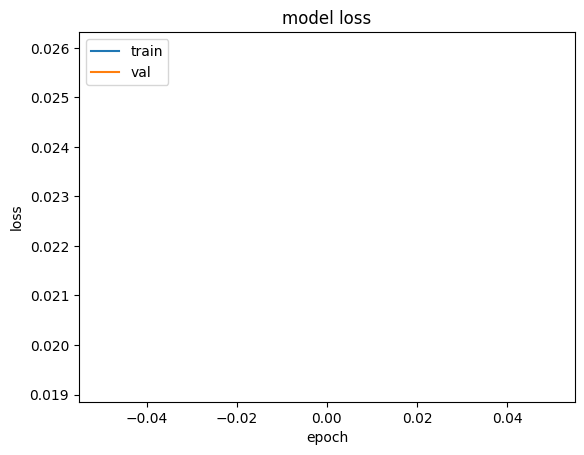

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.savefig(path+r'\Plots'+r'\loss.png')
print(path+r'\Plots'+r'\loss.png')
plt.show()

In [12]:
predictions = LSTM_model.predict(Time_series_X_test)
#y_pred_r=tf.round(predictions )
#y_pred_r=tf.math.minimum(y_pred_r,1)
predictions[predictions<=0.3333]=0
predictions[predictions > 0.3333]=1
pred=predictions
#pred=y_pred_r.numpy()
idx_y=np.load('y_test_idx.npy')
df=pd.DataFrame(pred)
df.insert(loc=0,column='day',value=idx_y[:,0])
#df.insert(loc=1,column='hour',value=idx_y[:,1])
#df['hour']=idx_y[:,1]

43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


In [13]:
mask1 = df.duplicated(subset=['day'],keep = "first") # this line is to get the first occ.
df2=df[~mask1]

pred_0_hr =df2.to_numpy()


In [14]:
pred_0_hr_list =[]
temp=[]
counter_op=0
for i in range (1,len(pred_0_hr)):
    if ( pred_0_hr[i,0]-pred_0_hr[i-1,0])<2:
        temp.append(pred_0_hr[i,:])
        if i== len(pred_0_hr)-1:
            temp_np=np.array(temp)
            index_for_temp=2
            new_temp_1=[]
            for count_reshape_r in range (0,len(temp_np)):
                new_temp=[]
                new_temp.append(temp_np[count_reshape_r,0])
                    
                for count_reshape_c in range (1,temp_np.shape[1]):
                    if ((count_reshape_c) % 120)==0 : 
                        new_temp.append(temp_np[count_reshape_r,count_reshape_c])
                        new_temp_1.append(new_temp)
                        new_temp=[]
                        new_temp.append(temp_np[count_reshape_r,0])
                        
                    else: 
                        new_temp.append(temp_np[count_reshape_r,count_reshape_c])

                           
            new_temp_1=np.array(new_temp_1)
            df_3=pd.DataFrame(new_temp_1)
            file_name=path +r'\Testing_data\excel'+str(counter_op)+'.xlsx'
            df_3.to_excel(file_name)
    else:
        temp_np=np.array(temp)
        index_for_temp=2
        new_temp_1=[]
        for count_reshape_r in range (0,len(temp_np)):
            new_temp=[]
            new_temp.append(temp_np[count_reshape_r,0])
                
            for count_reshape_c in range (1,temp_np.shape[1]):
                if ((count_reshape_c ) % 120)==0 : 
                    new_temp.append(temp_np[count_reshape_r,count_reshape_c])
                    new_temp_1.append(new_temp)
                    new_temp=[]
                    new_temp.append(temp_np[count_reshape_r,0])
                    
                else: 
                    new_temp.append(temp_np[count_reshape_r,count_reshape_c])
                    
       
        new_temp_1=np.array(new_temp_1)
        df_3=pd.DataFrame(new_temp_1)
        file_name=path+r'\Testing_data\excel'+str(counter_op)+'.xlsx'
        df_3.to_excel(file_name)
        temp=[]
        counter_op=counter_op+1
        


ModuleNotFoundError: No module named 'openpyxl'

In [16]:
#df.to_excel('out_33_10_xy_y_56.xlsx')
np.save(path +r'\output.npy',pred)


In [17]:
pred_t=pred
np.save(path +r'\output.npy',pred_t)

In [ ]:
Time_series_Y_test[Time_series_Y_test<=0.33]=0
Time_series_Y_test[Time_series_Y_test > 0.33]=1

tp=np.count_nonzero(Time_series_Y_test == 1)
tn =np.sum(Time_series_Y_test == 0)
#pp=np.count_nonzero(pred == 1)
#pn =np.sum(pred == 0)

print('trueval_pos')
print(tp)
print('trueval_neg')
print(tn)
print('positive_pred')
'''print(pp)
print('negative_pred')
print(pn)'''


In [ ]:
total_positive=np.count_nonzero(Time_series_Y_test == 1)
total_negative =np.sum(Time_series_Y_test == 0)
pred_pos=np.count_nonzero(pred_t == 1)
pred_neg =np.sum(pred_t == 0)

mat_1 = Time_series_Y_test + pred_t
tp =np.sum(mat_1 == 2)
tp_arr=np.sum(mat_1 == 2,0)
tn=np.sum(mat_1 == 0)
tn_arr=np.sum(mat_1 == 0,0)

mat_2 = Time_series_Y_test - pred_t
fn = np.sum(mat_2 == 1)
fn_arr=np.sum(mat_2 == 1,0)
fp =np.sum(mat_2 ==-1)
fp_arr=np.sum(mat_2 == -1,0)

In [ ]:
df_cm=pd.DataFrame(tp_arr.T)
#df. rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
df_cm.rename(columns={0:'True_Positive'},inplace='True')
df_cm.insert(loc=1,column='True_Negative',value=tn_arr)
df_cm.insert(loc=2,column='False_Positive',value=fp_arr)
df_cm.insert(loc=3,column='False_Negative',value=fn_arr)
lines =np.linspace(1, 120, num=120)
lines_arr = np.tile(lines,24)
df_cm.insert(loc=0,column='Line_No',value=lines_arr)
hour=np.linspace(1, 24, num=24)
hour_arr = np.repeat(hour,120)
df_cm.insert(loc=1,column='Hour',value=hour_arr)
file_name=path+'\confusion_matrix.xlsx'
df_cm.to_excel(file_name)
df_false_neg = df_cm.groupby(["Line_No"]).False_Negative.sum().reset_index()

In [ ]:
print('tp')
print(tp)
print('tn')
print(tn)
print('fp')
print(fp)
print('fn')
print(fn)

f1_score = 2*tp/(2*tp + fp + fn)
print('F1-score = ',f1_score)

print('Most false neg line')
print(df_false_neg.loc[df_false_neg.False_Negative.idxmax(),'False_Negative'])
print("No of times")
print(df_false_neg.loc[df_false_neg.False_Negative.idxmax(),'Line_No'])

In [ ]:
LSTM_model.evaluate(Time_series_X_test,Time_series_Y_test)
LSTM_model.evaluate(Time_series_X_train,Time_series_Y_train)


In [ ]:
# saving model 
LSTM_model.save(path+'\Model'+'\LSTM_model.h5')
np.save(path+'\Model'+'\my_history_LSTM_model.npy',history.history,allow_pickle=True)


In [ ]:
Y_percentage_test = np.load('T_s_Y_test_flattened.npy')
    
indices = np.where(mat_2 == 1)

print(Y_percentage_test[indices])
fn_per=Y_percentage_test[indices]

np.save(path+'\False_Negative.npy',fn_per)
plt.hist(fn_per)
plt.savefig(path+r'\Plots'+r'\Histogram_False_Negative.png')
plt.show() 
  
indices = np.where(mat_2 == -1)
fp_per=Y_percentage_test[indices]
np.save(path+'\False_Positive.npy',fp_per)
plt.hist(fp_per)
plt.savefig(path+r'\Plots'+'\Histogram_False_Positive.png')
plt.show() 

Errors_true_false =np.append(fn_per,fp_per)
plt.hist(Errors_true_false)
plt.savefig(path+r'\Plots'+'\Histogram_Errors.png')
plt.show() 
